Total Stiffness Matrix:
 [[  467.   700.  -467.   700.     0.     0.     0.     0.]
 [  700.  1400.  -700.   700.     0.     0.     0.     0.]
 [ -467.  -700.   664.  -306.  -197.   394.     0.     0.]
 [  700.   700.  -306.  2450.  -394.   525.     0.     0.]
 [    0.     0.  -197.  -394.  1772.  1181. -1575.  1575.]
 [    0.     0.   394.   525.  1181.  3150. -1575.  1050.]
 [    0.     0.     0.     0. -1575. -1575.  1575. -1575.]
 [    0.     0.     0.     0.  1575.  1050. -1575.  2100.]]
Displacement:
 [[ 0.        ]
 [ 0.00270531]
 [ 0.        ]
 [-0.00541063]
 [ 0.        ]
 [ 0.00386473]
 [ 0.        ]
 [ 0.        ]]
Reactions:
 [[-1.89371981]
 [ 0.        ]
 [ 1.28463768]
 [-9.33333333]
 [ 6.69603865]
 [ 9.33333333]
 [-6.08695652]
 [ 4.05797101]]
SF and BM for element 1: 
 [[-1.89371981]
 [ 0.        ]
 [ 1.89371981]
 [-5.68115942]]


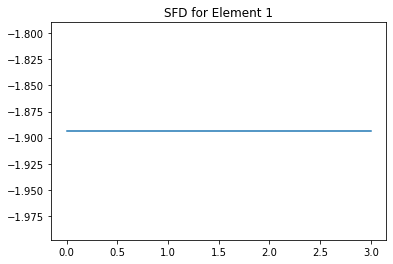

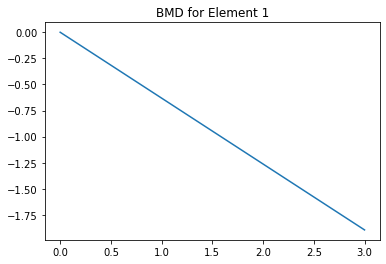

SF and BM for element 2: 
 [[13.39091787]
 [ 5.68115942]
 [14.60908213]
 [-8.11594203]]


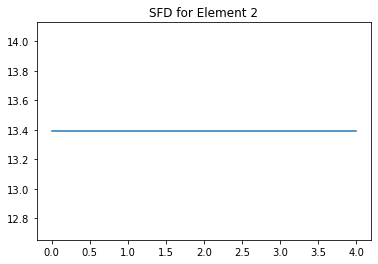

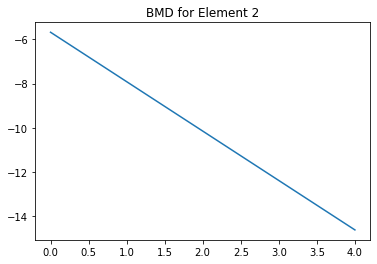

SF and BM for element 3: 
 [[ 6.08695652]
 [ 8.11594203]
 [-6.08695652]
 [ 4.05797101]]


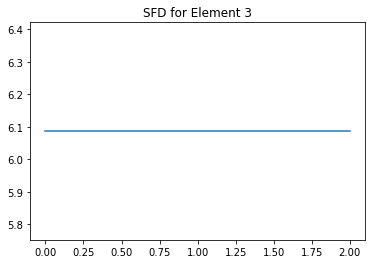

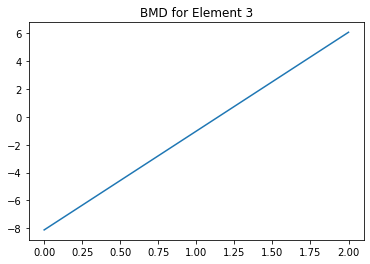

In [1]:
import numpy as np
import matplotlib.pyplot as plt

E=210000000
I=5*10**-6
W=7
number_of_nodes = 4
L=[3,4,2]
u = [0,1,0,1,0,1,0,0]
loe = 2 # load on element
F = np.array([0,(-1 * W*L[loe-1]**2)/12,(W*L[loe-1]**2)/12]).reshape((3,1))
app_load = np.array([-0.5*W*L[loe-1],(-1 * W*L[loe-1]**2)/12,-0.5*W*L[loe-1],(W*L[loe-1]**2)/12]).reshape((4,1))

total_stiffness_matrix = np.zeros((2*number_of_nodes,2*number_of_nodes))

k_matrix={}
for j in range(len(L)):
  esm=np.array([[12,6*L[j],-12, 6*L[j]],[6*L[j], 4*L[j]**2, -6*L[j], 2*L[j]**2],[-12, -6*L[j], 12, -6*L[j]],[6*L[j],2*L[j]**2, -6 *L[j], 4*L[j]**2]])
  k_matrix[j] = np.round((E*I/(L[j]**3)) * esm,0)

for i in range(len(L)):
  total_stiffness_matrix[i+i:i+i+4, i+i:i+i+4] += k_matrix[i]

print("Total Stiffness Matrix:\n",total_stiffness_matrix)

count = 0
for i in u:
  if i==1:
    count+=1

reduced_m = []
for i in range(2*number_of_nodes):
  for j in range(2*number_of_nodes):
    if u[i]*u[j] == 1:
      reduced_m.append(total_stiffness_matrix[i][j])
reduced_m = np.array(reduced_m).reshape((count,count))

rotation_m = np.linalg.solve(reduced_m, F)
a=0
b=0
disp_m=[]
for i in u:
  if i == 1:
    disp_m.append(rotation_m[a][0])
    a+=1
  else:
    disp_m.append(u[b])
  b+=1
disp_m = np.array(disp_m).reshape((2*number_of_nodes,1))
print("Displacement:\n",disp_m)
reactions=np.matmul(total_stiffness_matrix, disp_m)
print("Reactions:\n",reactions)

for i in range(len(L)):
  force_mat = np.matmul(k_matrix[i],disp_m[i+i:i+i+4])
  if i == loe-1:
    force_mat = force_mat - app_load
  print('SF and BM for element ' + str(i+1) +': \n', force_mat)
  plt.figure()
  plt.title('SFD for Element '+str(i+1))
  plt.plot([0,L[i]],[force_mat[0],force_mat[0]])
  plt.savefig('SFD for Element '+str(i+1)+'.png')
  plt.figure()
  plt.title('BMD for Element '+str(i+1))
  plt.plot([0,L[i]],[-1*force_mat[1],-1*force_mat[2]])
  plt.savefig('BMD for Element '+str(i+1)+'.png')
  plt.show()